# Data Analysis

### Features explanation

* Popularity: 0 = not popular, 100 = maximum popularity

* Acousticness: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

* Danceability: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

* Energy: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

* Instrumentalness: Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

* Key: The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.

* Liveness: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

* Loudness: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db. 

* Mode: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

* Speechiness: 	Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

* Tempo: The overall estimated tempo of a track in beats per minute (BPM).

* Time signature: 	An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).

* Valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Import models

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [4]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

### Data import and initial analysis

In [5]:
all_tracks = pd.read_csv('../exported_data/all_tracks.csv',index_col=0)

In [6]:
# *** IN ALL THE ANALYSIS WHEN THE FEATURES ARE USED THEY WILL REFERRING TO THIS ***

features = ['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence']

In [7]:
all_tracks.head()

,artist_name,track_name,track_id,popularity,like,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Kyle Landry,Howl's Moving Castle Theme,3JTjiMAPVMfwjzPiG5R3hK,53,1,0.940,0.322,350348,0.1440,0.917,7,0.0744,-17.448,0,0.0384,142.818,3,0.0471
1,Kyle Landry,Shigatsu - Otouto Mitai Na Sonzai Piano,5tr1bCo0XRU3ZciXahlTKm,46,1,0.967,0.368,302336,0.1240,0.803,3,0.1820,-21.851,1,0.0513,138.910,4,0.1040
2,Kyle Landry,"Passion (From ""Kingdom Hearts II"") [Piano Solo]",2xFBrGSZ4mSURd8p5IU4ed,47,1,0.964,0.406,274656,0.1300,0.870,1,0.0964,-20.320,0,0.0515,116.005,4,0.0975
3,Kyle Landry,Dango Daikazoku,7c6mInVLlpnaYD55R72FDX,44,1,0.976,0.384,310974,0.0400,0.896,8,0.0943,-23.524,1,0.0357,95.854,4,0.1000
4,Kyle Landry,Interstellar - First Step,0kznmyiS92b9v1rkn9WDqV,40,1,0.961,0.232,508622,0.0651,0.930,9,0.0607,-21.866,0,0.0387,74.750,3,0.0372


In [64]:
# Change order of columns

all_tracks = all_tracks[['artist_name', 'track_name', 'track_id', 'like', 'popularity',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence']]

In [8]:
all_tracks.describe()

,popularity,like,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
count,9945.000000,9945.000000,9945.000000,9945.000000,9.945000e+03,9945.000000,9945.000000,9945.000000,9945.000000,9945.000000,9945.000000,9945.000000,9945.000000,9945.000000,9945.000000
mean,32.424937,0.682755,0.225286,0.535810,2.569605e+05,0.706409,0.240350,5.291604,0.193453,-7.656894,0.615887,0.079059,123.363494,3.893012,0.481935
std,22.467520,0.465427,0.305024,0.180306,1.200505e+05,0.242275,0.357327,3.547153,0.157934,4.967167,0.486409,0.069747,29.926952,0.446917,0.257653
min,0.000000,0.000000,0.000001,0.000000,3.500000e+03,0.000020,0.000000,0.000000,0.000000,-41.816000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,14.000000,0.000000,0.002850,0.403000,1.950000e+05,0.588000,0.000000,2.000000,0.094500,-8.872000,0.000000,0.038500,99.968000,4.000000,0.273000
50%,33.000000,1.000000,0.064500,0.538000,2.300270e+05,0.770000,0.000900,5.000000,0.127000,-6.170000,1.000000,0.052800,120.592000,4.000000,0.479000
75%,48.000000,1.000000,0.347000,0.678000,2.865900e+05,0.896000,0.569000,8.000000,0.260000,-4.590000,1.000000,0.089800,141.938000,4.000000,0.690000
max,100.000000,1.000000,0.996000,0.966000,2.025224e+06,0.999000,0.995000,11.000000,0.988000,-0.528000,1.000000,0.883000,220.121000,5.000000,0.984000


In [9]:
# Check if there are NaNs in the dataframe
all_tracks.isna().sum().any()

False

In [10]:
# Check that all datatypes are correct
all_tracks.dtypes

artist_name          object
track_name           object
track_id             object
popularity            int64
like                  int64
acousticness        float64
danceability        float64
duration_ms           int64
energy              float64
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
speechiness         float64
tempo               float64
time_signature        int64
valence             float64
dtype: object

### Data visualization

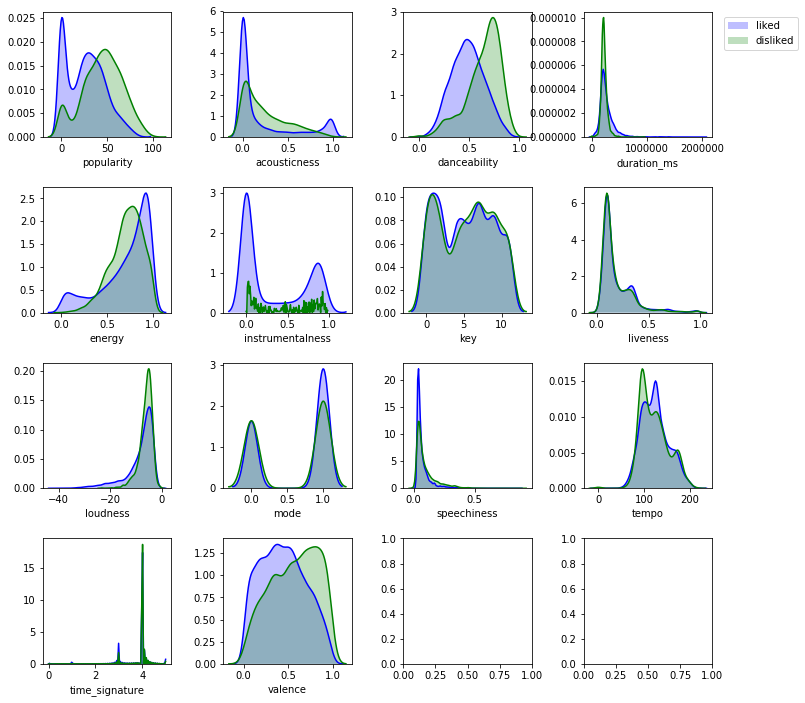

In [13]:
# Create plots for every feature distinguishing between liked and disliked songs

f, ax = plt.subplots(4,4,figsize=(12,12))

cols = [col for col in all_tracks.columns][4:]

plt.subplots_adjust(wspace=0.4,hspace=0.4)

i = 0
for row in ax:
    for col in row:
        if i == 14:
            break
        else:
            sns.distplot(all_tracks[all_tracks['like']==1][cols[i]],hist=False,kde_kws={"shade": True},ax=col,color='blue')
            sns.distplot(all_tracks[all_tracks['like']==0][cols[i]],hist=False,kde_kws={"shade": True},ax=col,color='green')
            i += 1

ax[0][3].legend(['liked','disliked'],bbox_to_anchor=(1.05, 1), loc=2)

In [14]:
# OBSERVATIONS

# In general terms, the songs that I liked are less popular, less danceable, and less happy than the ones that I disliked.
# Therefore, it might be that these features are more determining in the classification algorithm
# The rest of the features don't seem to be really different, on average, between liked and disliked songs.

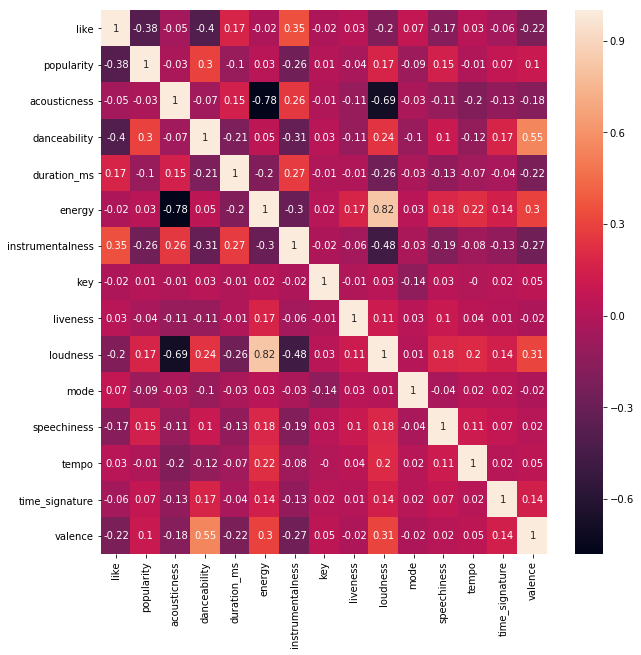

In [15]:
plt.figure(figsize=(10,10))
sns.heatmap(round(all_tracks.corr(),2),annot=True)

In [18]:
# OBSERVATIONS

# The correlation matrix confirms what is observed with the distplots: the like ratio seems presents a slightly negative
# correlation with popularity and danceabilty, and slightly positive with instrumentalness.

# As for the relationships among song features, there is a clear negative correlation between acousticness and energy
# and loudness (which are correlated with each other)
# In addition, danceability seems to be moderately correlated with valence.

### Statistical analysis

In [18]:
from scipy import stats

In [55]:
def features_tests(df, features):
    
    for feature in features:
        
        liked = df[df['like']==1][feature]
        disliked = df[df['like']==0][feature]
        
        print(f'{feature} of liked songs: {round(np.mean(liked),2)} +- {round(np.std(liked),2)}')
        print(f'{feature} of disliked songs: {round(np.mean(disliked),2)} +- {round(np.std(disliked),2)}')
        
        test = stats.ttest_ind(liked, disliked, equal_var=False)

        print(f'Test statistic: {round(test[0],2)}, p-value: {test[1]}')

        print('-' * 40)

In [56]:
features_tests(all_tracks, features)

popularity of liked songs: 26.63 +- 20.4
popularity of disliked songs: 44.9 +- 21.62
Test statistic: -39.91, p-value: 3.6012708881178354e-308
----------------------------------------
acousticness of liked songs: 0.22 +- 0.33
acousticness of disliked songs: 0.25 +- 0.24
Test statistic: -5.35, p-value: 9.20924000632205e-08
----------------------------------------
danceability of liked songs: 0.49 +- 0.16
danceability of disliked songs: 0.64 +- 0.17
Test statistic: -43.31, p-value: 0.0
----------------------------------------
duration_ms of liked songs: 270910.31 +- 138064.89
duration_ms of disliked songs: 226938.53 +- 55501.78
Test statistic: 22.6, p-value: 2.5954694817748572e-110
----------------------------------------
energy of liked songs: 0.7 +- 0.27
energy of disliked songs: 0.72 +- 0.17
Test statistic: -2.85, p-value: 0.004366459912077377
----------------------------------------
instrumentalness of liked songs: 0.33 +- 0.38
instrumentalness of disliked songs: 0.06 +- 0.19
Test sta

In [57]:
# There is a significant difference between liked and disliked songs for all the parameters:
# the songs that I liked are less popular, less danceable, longer, more instrumental, less loud, and sadder.

### Data pre-processing

In [12]:
def scaling(df):
    '''Returns a dataframe with scaled features.
       
    Input:
    --------------
    df (df): dataframe without all features scaled
    
    Returns:
    --------------
    df (df): dataframe with all features scaled
    '''
    
    columns_to_normalize = ['popularity','duration_ms','loudness','tempo','key','time_signature']
    
    for col in columns_to_normalize:
        x = df[col].values.reshape(-1,1)
        minmaxscaler = MinMaxScaler()
        x_scaled = minmaxscaler.fit_transform(x)
        df[col] = pd.DataFrame(x_scaled)
    
    return df.dropna()

In [13]:
all_tracks = scaling(all_tracks)

In [28]:
all_tracks.shape

(9940, 18)

In [21]:
all_tracks.head()

,artist_name,track_name,track_id,like,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Kyle Landry,Howl's Moving Castle Theme,3JTjiMAPVMfwjzPiG5R3hK,1,0.53,0.940,0.322,0.171561,0.1440,0.917,0.636364,0.0744,0.590196,0,0.0384,0.648816,0.6,0.0471
1,Kyle Landry,Shigatsu - Otouto Mitai Na Sonzai Piano,5tr1bCo0XRU3ZciXahlTKm,1,0.46,0.967,0.368,0.147812,0.1240,0.803,0.272727,0.1820,0.483555,1,0.0513,0.631062,0.8,0.1040
2,Kyle Landry,"Passion (From ""Kingdom Hearts II"") [Piano Solo]",2xFBrGSZ4mSURd8p5IU4ed,1,0.47,0.964,0.406,0.134121,0.1300,0.870,0.090909,0.0964,0.520636,0,0.0515,0.527006,0.8,0.0975
3,Kyle Landry,Dango Daikazoku,7c6mInVLlpnaYD55R72FDX,1,0.44,0.976,0.384,0.152085,0.0400,0.896,0.727273,0.0943,0.443034,1,0.0357,0.435460,0.8,0.1000
4,Kyle Landry,Interstellar - First Step,0kznmyiS92b9v1rkn9WDqV,1,0.40,0.961,0.232,0.249847,0.0651,0.930,0.818182,0.0607,0.483191,0,0.0387,0.339586,0.6,0.0372


In [14]:
def under_sample(df):
    '''Applies under-sampling to a dataframe with imbalanced classes (class 0 << class 1)
    
    Input:
    --------------
    df: dataframe with imbalanced classes 
    
    Returns:
    --------------
    df: dataframe with balanced classes
    '''
    
    df_class_0 = df[df['like']==0]
    df_class_1 = df[df['like']==1]
    
    df_class_1_under = df_class_1.sample(df_class_0.shape[0])
    
    df_under = pd.concat([df_class_0,df_class_1_under],axis=0)
    
    return df_under

In [15]:
all_under = under_sample(all_tracks)

In [26]:
all_under.shape

(6300, 18)

In [16]:
def over_sample(df):
    '''Applies over-sampling to a dataframe with imbalanced classes (class 0 << class 1)
    
    Input:
    --------------
    df: dataframe with imbalanced classes 
    
    Returns:
    --------------
    df: dataframe with balanced classes
    '''
    
    df_class_0 = df[df['like']==0]
    df_class_1 = df[df['like']==1]
    
    df_class_0_over = df_class_0.sample(df_class_1.shape[0],replace=True)
    
    df_over = pd.concat([df_class_0_over,df_class_1],axis=0)
    
    return df_over

In [17]:
all_over = over_sample(all_tracks)

In [31]:
all_over.shape

(13580, 18)

# Machine learning

### Overview of classification models performance with cross-validation

In [71]:
def cross_validation(X,y,n):
    '''Runs cross-validation on five classification models and prints the results (mean and standard deviation).
    
    Input:
    --------------
    X: dataframe of features
    y: target
    n: number of splits in cross-validation
    '''
    
    cv_log = cross_val_score(LogisticRegression(),X,y,cv=n)
    cv_svc = cross_val_score(SVC(),X,y,cv=n)
    cv_knn = cross_val_score(KNeighborsClassifier(),X,y,cv=n)
    cv_tree = cross_val_score(DecisionTreeClassifier(),X,y,cv=n)
    cv_forest = cross_val_score(RandomForestClassifier(),X,y,cv=n)
    
    print('Logistic regression --> Mean:', round(np.mean(cv_log),2), '/ Std.:', round(np.std(cv_log),2))
    print('SVC --> Mean:', round(np.mean(cv_svc),2), '/ Std.:', round(np.std(cv_svc),2))
    print('KNN --> Mean:', round(np.mean(cv_knn),2), '/ Std.:', round(np.std(cv_knn),2))
    print('Decision tree --> Mean:', round(np.mean(cv_tree),2), '/ Std.:', round(np.std(cv_tree),2))
    print('Random forest --> Mean:', round(np.mean(cv_forest),2), '/ Std.:', round(np.std(cv_forest),2))

#### With no re-sampling strategies

In [46]:
# NOTE: when cross_val_score is used, with integer/None inputs, if the estimator is a classifier and y is either 
# binary or multiclass, StratifiedKFold is used. Otherwise, Kfolds is used.

In [51]:
X = all_tracks[features]
y = all_tracks['like']
cross_validation(X,y,10)

Logistic regression --> Mean: 0.79 / Std.: 0.1
SVC --> Mean: 0.81 / Std.: 0.09
KNN --> Mean: 0.8 / Std.: 0.07
Decision tree --> Mean: 0.78 / Std.: 0.06
Random forest --> Mean: 0.83 / Std.: 0.07


#### *** Previous results without scaling features. Scaling has significantly improved SVC, KNN and Log. Reg., but not the decision tree and random forest

- Logistic regression:  0.7152171319373528***
- SVC:  0.6827553259254018***
- KNN:  0.6430331739178792***
- Decision tree:  0.7841013922732374***
- Random forest:  0.8313569861379332***

In [30]:
# Conclusions:

# With the default parameters, the Random Forest has the best performance

#### With under-sampling

In [53]:
X = all_under[features]
y = all_under['like']
cross_validation(X,y,10)

Logistic regression --> Mean: 0.77 / Std.: 0.1
SVC --> Mean: 0.8 / Std.: 0.11
KNN --> Mean: 0.79 / Std.: 0.1
Decision tree --> Mean: 0.77 / Std.: 0.07
Random forest --> Mean: 0.83 / Std.: 0.1


In [54]:
# The results are very similar as when no re-sampling was performed

#### With over-sampling

In [56]:
X = all_over[features]
y = all_over['like']
cross_validation(X,y,5)

Logistic regression --> Mean: 0.78 / Std.: 0.05
SVC --> Mean: 0.81 / Std.: 0.04
KNN --> Mean: 0.84 / Std.: 0.03
Decision tree --> Mean: 0.89 / Std.: 0.02
Random forest --> Mean: 0.91 / Std.: 0.03


In [82]:
# The results with over-sampling improve significantly for the decision tree and random forest

### Check random forest without cross-validation and different sampling strategies

#### Without re-sampling

In [58]:
X = all_tracks[features]
y = all_tracks['like']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [59]:
rfc = RandomForestClassifier()

In [60]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [61]:
y_pred = rfc.predict(X_test)

In [62]:
accuracy_score(y_test,y_pred)

0.8658618376928237

In [63]:
confusion_matrix(y_test,y_pred)

array([[ 751,  183],
       [ 217, 1831]], dtype=int64)

#### With under-sampling

In [68]:
X = all_under[features]
y = all_under['like']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [69]:
rfc = RandomForestClassifier()

In [70]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [71]:
y_pred = rfc.predict(X_test)

In [72]:
accuracy_score(y_test,y_pred)

0.855026455026455

In [73]:
confusion_matrix(y_test,y_pred)

array([[845, 114],
       [160, 771]], dtype=int64)

#### With over-sampling

In [74]:
X = all_over[features]
y = all_over['like']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [75]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)

In [76]:
accuracy_score(y_test,y_pred)

0.9258713794796269

In [77]:
confusion_matrix(y_test,y_pred)

array([[1976,   72],
       [ 230, 1796]], dtype=int64)

In [79]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93      2048
           1       0.96      0.89      0.92      2026

   micro avg       0.93      0.93      0.93      4074
   macro avg       0.93      0.93      0.93      4074
weighted avg       0.93      0.93      0.93      4074



In [80]:
# Notes:

# Precision: TP / (TP + FP) 
    # For class 0: 1976 / (1976+230) = 0.90
    # For class 1: 1796 / (1796 + 72) = 0.96
    
# Recall/sensitivity: TP/ (TP + FN)
    # For class 0: 1976 / (1976 + 72) = 0.96
    # For class 1: 1796 / (1796 + 230) = 0.89

In [81]:
# Conclusions

# The model classifies performs pretty well, classifying over 90% of songs correctly.

# For disliked songs, the precision is slightly lower, and around 90% of the songs are classified correctly.
# For liked song, the precision is much better: 96% of the songs are classified as liked.

### MODEL OPTIMIZATION

In [86]:
# Notes

# n_estimators: number of trees in the forest (100 by default)
# max_depth: maximum depth of the tree (by default, nodes expand untill all leaves are pure or leaves < min_samples_split)
# min_samples_split: minimum number of samples to split a node (2 by default)
# min_samples_leaf: minimum number of samples required at a leaf node (1 by default)
# max_features: number of features to consider when looking for the best split (by default, the sqrt of number of features)

In [90]:
# CHECKING BEST PARAMETER COMBINATION FOR RANDOM FOREST CLASSIFIER

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

rfc = RandomForestClassifier()

# Parameters to try
parameter_grid = {'n_estimators':list(range(20,101,20)),
                  'max_depth':list(range(4,16)),
                  'min_samples_split':list(range(5,21,5)),
                  'max_features':['auto','log2']
                 }
                  
# Instantiate stratified cross validation
cross_validation = StratifiedKFold(n_splits=5)

# Create grid search object
grid_search = GridSearchCV(rfc,
                           param_grid=parameter_grid,
                           cv=cross_validation,
                           n_jobs=-1)

# Fit model with grid_search
grid_search.fit(X_train, y_train) # uses train data from previous over sampling
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.9013254786450663
Best parameters: {'max_depth': 10, 'max_features': 10, 'min_samples_split': 5, 'n_estimators': 20}


### Run final model with best parameters

In [18]:
X = all_over[features]
y = all_over['like']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [19]:
rfc = RandomForestClassifier(max_depth=15,max_features='auto',min_samples_split=5, n_estimators=20)
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)

In [20]:
accuracy_score(y_test,y_pred)

0.9251350024545901

In [74]:
confusion_matrix(y_test,y_pred)

array([[1957,   91],
       [ 192, 1834]], dtype=int64)

In [35]:
dtc = DecisionTreeClassifier(max_depth=5,max_features='auto',min_samples_split=30)
dtc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)

In [36]:
accuracy_score(y_pred,y_test)

0.9251350024545901

In [22]:
import io

In [24]:
from sklearn.tree import export_graphviz

In [25]:
import pydotplus

In [28]:
import imageio

In [29]:
def showtree(tree, features, path):
    f = io.StringIO()
    export_graphviz(tree, out_file=f,feature_names=features)
    pydotplus.graph_from_dot_data(f.getvalue()).write_png(path)
    img = imageio.imread( path )
    plt.rcParams['figure.figsize'] = (20,20)
    plt.imshow(img)

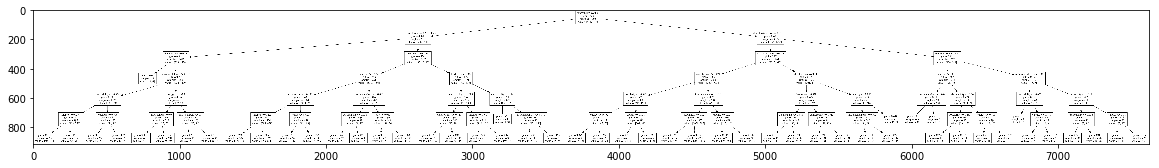

In [34]:
showtree(dtc,features,'dt_02.png')

In [75]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93      2048
           1       0.95      0.91      0.93      2026

   micro avg       0.93      0.93      0.93      4074
   macro avg       0.93      0.93      0.93      4074
weighted avg       0.93      0.93      0.93      4074



In [76]:
importances =pd.DataFrame(rfc.feature_importances_,index=X.columns,columns=['importances']).sort_values(by=['importances'],ascending=False)

In [77]:
importances

,importances
instrumentalness,0.206387
acousticness,0.152982
danceability,0.137438
popularity,0.082584
loudness,0.075770
energy,0.074364
valence,0.059919
duration_ms,0.059026
tempo,0.046137
speechiness,0.046132


In [78]:
# As it has been already observed with the visualization and statisical analysis, the features that are most determinant
# when classifying a track are instrumentalness, danceability, popularity, loudness, and valence. There are other parameters
# also classified as important such as acousticness and energy which were not seen as important in the previous analysis.

In [131]:
from sklearn.externals import joblib

In [132]:
# Save model to disk
filename = 'final_model.sav'
joblib.dump(rfc, filename)

['final_model.sav']